#SETEMBRO AMARELO: DATA SCIENCE PARA ANÁLISE DE SUICÍDIOS NO BRASIL

O suicídio é o ato de tirar a própria vida de forma consciente e intencional (BRASIL, 2018). Conforme as estimativas globais de saúde sobre o suicídio no mundo, divulgadas em 2019 pela Organização Mundial da Saúde (OMS), cerca de 800 mil pessoas morrem todos os anos por suicídio, sendo esta, umas das principais causas de morte no mundo, superando o número de mortes ocasioadas por doenças como malária e câncer de mama (OMS, 2019). Segundo a organização, o oitavo país com o maior número de casos de suicídio é o **BRASIL**.

O Setembro Amarelo (SA) busca através de campanhas de conscientização, prevenir o suicídio. Esta campanha foi idealizada pela Associação Brasileira de Psiquiatria (ABP) juntamente com o Conselho Federal de Medicina (CFM), tornando-se muito importante contra este sério problema de saúde pública (ABP, 2020).

Utilizando a ciência de dados, este artigo tem como objetivo a realização de uma análise básica sobre o suicídio no **BRASIL**. Espera-se que este tipo de conteúdo seja visto, disseminado e trabalhado por entusiastas e profissionais da área da computação.


---
**REFERÊNCIAS:**

Organização Mundial da Saúde (OMS). **Suicide in the World:** Global Health Estimates. 2019. Disponível em: <https://apps.who.int/iris/bitstream/handle/10665/326948/WHO-MSD-MER-19.3-eng.pdf?ua=1/ >. Acesso em: 11 ago. de 2020.

Associação Brasileira de Psiquiatria (ABP). Campanha Setembro Amarelo. 2020. Disponível em: <https://www.abp.org.br/setembro-amarelo/ >. Acesso em: 11 ago. de 2020.

BRASIL. Ministério da Saúde. Biblioteca Virtual em Saúde. Setembro Amarelo e Dia Mundial de Prevenção ao Suicídio - 10/9. 2018. Disponível em: <http://bvsms.saude.gov.br/component/content/article?id=2787/ >. Acesso em: 11 ago. de 2020.



---






#Descrição dos Dados

Os dados que serão analisados fazem parte de um dataset sobre suicídio no mundo e, está disponível publicamente no KAGGLE (KAGGLE, 2020).

O dataset apresenta dados de suicídio que ocorreram em 101 países durante 32 anos (1985 a 2016) e, mostra informações socioeconômicas com taxas de suicídio por ano e país. A base de dados possui 12 colunas, que correspondem a variáveis ou features:

* country: o país em que o indivíduo cometeu suicídio
* year: o ano que aconteceu o suicídio
* sex: o sexo do indivíduo (masculino ou feminino)
* age: a faixa etária de idade que o sujeito se encontra 
* suicides_no: o número de suicídios ocorridos
* population: a população do país
* suicides/100k pop: o número de suicídios por 100 mil pessoas
* country-year: indentificador (country concatenado com year)
* HDI for year: Índice de Desenvolvimento Humano (IDH)
* gdp_for_year: PIB do país no ano em questão
* gdp_per_capita: PIB per capita do país no ano em questão
* generation: nome da geração

---
**REFERÊNCIAS**

KAGGLE. Suicide Rates Overview 1985 to 2016. 2020. Disponível em: <https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/ >. Acesso em: 11 ago. 2020.

**O base de dados é um compilado de outras quatro bases de dados, sendo que os autores utilizaram as seguintes fontes:**

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/



---



**ESSA ANÁLISE FOI REALIZADA POR: IAGO HENRIQUE DE OLIVERA**



#Configurações iniciais

In [129]:
#Importação de bibliotecas para manipulação de dados e plotagem de gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
#Lista de cores para utilizar nos gráficos
colors_one = ["#0092dc", "#009ce8", "#0da7f3", "#2eb2ff", "#42bdff", "#53c8ff", "#62d3ff"]
colors_two = ["#2eb2ff", "#71b0e4", "#92adc8", "#a9abad", "#baa992", "#c8a877", "#d3a65a"]

In [131]:
#Carregando a base de dados
dataframe = pd.read_csv('https://raw.githubusercontent.com/iagoho/data_science/master/datasets/suicide_dataset.csv')

#Análise Exploratória dos Dados de Suicídio

Após carregar a base de dados sobre o suicídio no mundo, mostra-se o shape do dataframe, ou seja, a dimensionalidade do mesmo. Nota-se que o dataframe em questão possui 27820 linhas e 12 colunas, sendo que cada coluna representa uma *feature* na qual os dados são agrupados: país, ano de registro, sexo, idade, número de suicídios, entre outras. Em seguida, exibe-se as cinco primeiras linhas do dataframe, na qual pode-se visualizar alguns dados.

In [132]:
#Mostrando o shape do dataframe
print("SHAPE DO DATAFRAME = " + str(dataframe.shape))

#Exibindo as cinco primeiras linhas do dataframe
dataframe.head(5)

SHAPE DO DATAFRAME = (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Na sequência, foi realizado o agrupamento dos dados pelo ano, sendo que todas as linhas referentes a cada ano foram somadas. Este procedimento foi realizado com o objetivo de mostrar estatísticas anuais, mais especificamente o número de suicídios por ano. Essa informação é exibida no gráfico a seguir.

In [133]:
estatisticas_anuais = dataframe.groupby('year').sum()

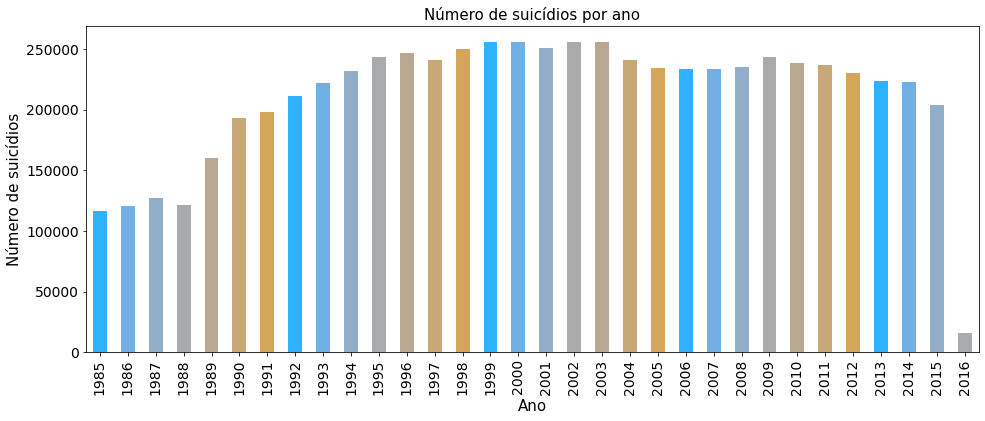

In [134]:
ax = estatisticas_anuais['suicides_no'].plot(kind='bar', figsize=(16, 6), fontsize=14, color=colors_two)
plt.title('Número de suicídios por ano', fontsize = 15)
ax.set_xlabel("Ano", fontsize=15)
ax.set_ylabel("Número de suicídios", fontsize=15)
plt.show()

Através do gráfico, nota-se que houve um pequeno crescimento de casos de suicídio entre os anos de 1985 e 1987. Em 1988 ocorreu uma leve redução de casos em comparação ao ano de 1987. Na sequência, ocorreu uma ascensão do número de suicidios até o ano de 1996. Em 1997 teve uma leve queda em relação a 1996. No entanto, houve um crecimento em 1998, sendo que o número de suicídios manteve-se praticamente constante até 2003, com poucas variações. Ocorreu uma diminuição de casos em 2004 e 2005, sem muitas variações até 2008. Em 2009, ocorreu um crescimento de casos de suicídio. Porém, este número apresentou quedas gradativas até 2015.

Pelo gráfico, o número de suicídios reduziu muito no ano de 2016, em comparação aos anos anteriores. Sabe-se que estão sendo realizadas políticas públicas para a conscientização e prevenção do suicídio, apresentando potencial para diminuir o número de casos. No entanto, uma análise mais robusta precisa ser realizada, pois apesar da redução apresentada no gráfico ser empolgante, pode não representar a realidade.

A tabela abaixo apresenta a quantidade de dados que foram registrados entre os anos de 2010 e 2016 e, estão presentes no dataframe de suicídios no mundo.

In [135]:
def colunas_ano(ano_inicial, ano_final):
  colunas_ano = {}
  for i in range(ano_final - ano_inicial + 1):
    ano = ano_inicial + i
    colunas_ano[str(ano)] = [len(dataframe[dataframe.year == ano])]
  df = pd.DataFrame(data=colunas_ano, index=["QUANT. DE DADOS"])
  return df.head()

In [136]:
colunas_ano(2010, 2016)

,2010,2011,2012,2013,2014,2015,2016
QUANT. DE DADOS,1056,1032,972,960,936,744,160


Pode-se observar que a quantidade de dados referente ao ano de 2016 é igual a 160. Ou seja, uma quantidade de dados consideravelmente menor em relação aos anos anteriores. Desta maneira, constata-se que os dados de 2016 são escassos, podendo levar a interpretações equivocadas.

Abaixo, mostra-se a quantidade de dados relacionados ao Brasil, entre os anos de 1985 e 2016.

In [137]:
def colunas_ano_brasil(ano_inicial, ano_final, pais):
  colunas_ano = {}
  for i in range(ano_final - ano_inicial + 1):
    ano = ano_inicial + i
    colunas_ano[str(ano)] = [len(dataframe.loc[(dataframe.year == ano) & (dataframe.country == pais)])]
  df = pd.DataFrame(data=colunas_ano, index=["QUANT. DE DADOS"])
  return df.head()

In [138]:
colunas_ano_brasil(1985, 2000, 'Brazil')

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
QUANT. DE DADOS,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [139]:
colunas_ano_brasil(2001, 2016, 'Brazil')

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
QUANT. DE DADOS,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0


Ao contrário dos anos anteriores, foi verificado que não existe nenhum dado acerca do Brasil no ano de 2016. Algumas abordagens poderiam ser utilizadas para levar em consideração o ano em questão, como por exemplo a busca por estes dados em outras fontes ou, até mesmo, a previsão com base no conhecimento anterior. Porém, para facilitar a análise, optou-se pela remoção dos dados referentes ao ano de 2016.

In [140]:
#Removendo os dados referentes ao ano de 2016.
dataframe = dataframe[dataframe.year != 2016]

#Ranking de Suicídios por País

A seguir é apresentado um gráfico do ranking de suicídios por país, no qual é apresentado os dez paises com maior número de suicídio. A oitava colocação ficou com os brasileiros, coincidindo com o relatório da OMS.

In [141]:
suicidios_country = dataframe.groupby('country').agg({'suicides_no':'sum'}).sort_values(by='suicides_no', ascending = False)

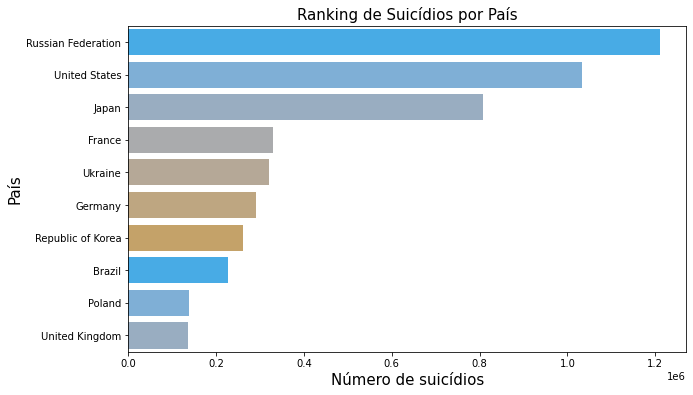

In [142]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=suicidios_country['suicides_no'].head(10), y=suicidios_country.head(10).index, palette=colors_two)
plt.title('Ranking de Suicídios por País', fontsize = 15)
ax.set_ylabel("País", fontsize=15)
ax.set_xlabel("Número de suicídios", fontsize=15)
plt.show()

#Taxa de Suicídio no Brasil e no Mundo

Dois dataframes foram criados. O primeiro deles, leva em consideração os suicídios no mundo. Já o segundo, considera apenas os dados referentes ao suicídio no Brasil.

In [143]:
#Dataframe com dados de suicídios no mundo
suicidios_mundo = dataframe.copy()

#Dataframe com dados de suicídios entre os brasileiros
suicidios_brasil = dataframe[dataframe.country == "Brazil"].copy()

#Dataframe com os anos dos registros, sem repetições (por isso usou-se unique).
anos_unicos = suicidios_brasil.year.unique()

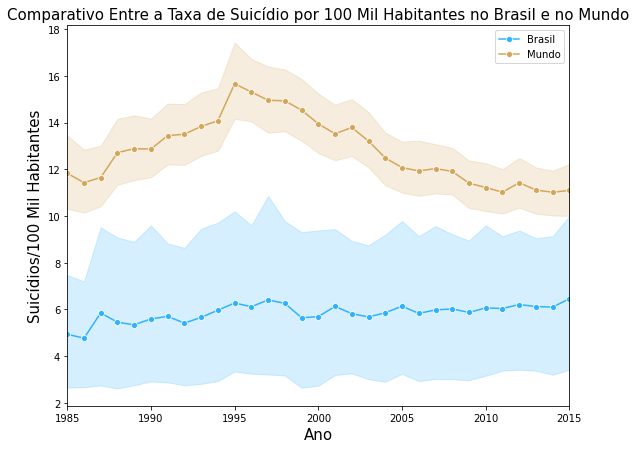

In [144]:
#Gráfico do Comparativo Entre a Taxa de Suicídio por 100 Mil Habitantes no Brasil e no Mundo (1985 - 2015)
plt.figure(figsize=(9,7))
ax = sns.lineplot(x=suicidios_brasil['year'], y=suicidios_brasil['suicides/100k pop'], color='#2eb2ff', label='Brasil',  marker='o')
ax = sns.lineplot(x=suicidios_mundo['year'],  y=suicidios_mundo['suicides/100k pop'], color='#d3a65a', label='Mundo',  marker='o')
plt.title('Comparativo Entre a Taxa de Suicídio por 100 Mil Habitantes no Brasil e no Mundo', fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
ax.set_ylabel("Suicídios/100 Mil Habitantes", fontsize=15)
plt.xlim(1985, 2015)
plt.legend()
plt.show()

Através do gráfico acima, observa-se que a taxa mundial de suicídio por 100 mil habitantes é maior que a taxa de suicídio entre os brasileiros. No entanto, pode-se notar que a partir de 1995 a taxa de suicídios no mundo apresenta reduções gradativas. Já no Brasil, a taxa de suicídio por 100 mil habitantes apresenta uma tendência de crescimento ao longo dos anos.

#Suicídios no Brasil por Faixa Etária e Ano

Abaixo foi criada uma tabela, na qual os dados foram agrupados levando em consideração as faixas etárias em função do ano. Para cada faixa etária foi calculada a média de suicídios entre os sexos masculino e feminino, no respectivo ano.

In [145]:
#Criação da tabela com a média de suicídios por faixas etárias em função do ano
tabela_faixa_etaria = pd.crosstab(suicidios_brasil['year'], suicidios_brasil['age'], values=suicidios_brasil['suicides_no'], aggfunc=[np.mean])

#Exibição de alguns dados da tabela
tabela_faixa_etaria.head()

mean                                                         
age  15-24 years 25-34 years 35-54 years 5-14 years 55-74 years 75+ years
year                                                                     
1985       470.5       530.0       653.5       38.0       341.5      80.5
1986       508.0       505.5       651.0       31.0       372.0      68.0
1987       502.0       565.5       724.5       33.5       422.0      88.5
1988       472.0       557.5       724.0       30.0       356.0      93.5
1989       491.5       569.0       692.5       31.5       354.5      92.5

O gráfico abaixo exibe a média de suicídios por faixas etárias em função do ano (1985 - 2015).

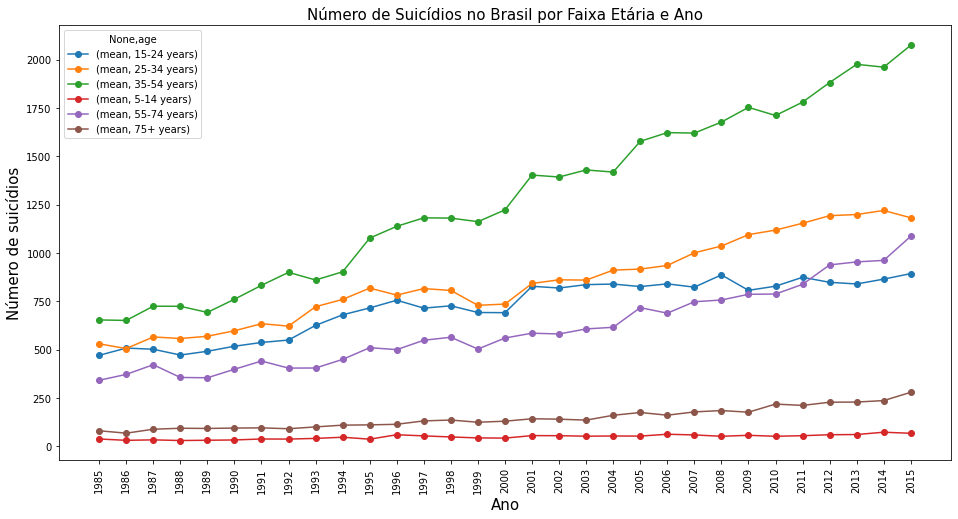

In [146]:
#Plotagem do gráfico da média de suicídios por faixas etárias em função do ano
ax = tabela_faixa_etaria.plot(kind='line' , figsize=(16,8), marker='o', xticks=anos_unicos )
plt.title('Número de Suicídios no Brasil por Faixa Etária e Ano', fontsize=15)
ax.set_xticklabels(anos_unicos, rotation=90)
ax.set_xlabel("Ano", fontsize=15)
ax.set_ylabel("Número de suicídios", fontsize=15)
plt.show()

Por meio do gráfico, pode-se observar que entre 1985 e 2015 o número de suicídios sempre foi consideravelmente maior entre pessoas com idades entre 35 e 54 anos, existindo uma tendência de crescimento ao longo dos anos. Entre 2012 e 2015, pessoas com idades entre 25 e 34 anos, ocupavam a segunda colocação em número de suicídios. Entre os mesmos anos, pessoas com idades entre 55 e 74 anos estavam na terceira posição, sendo que esta posição era ocupada anteriormente por pessoas entre 15 e 24 anos (faixa etária que ocupa a quarta posição). Na quinta posição do ranking acerca das faixas etárias com maior número de suicídios, estão pessoas com idade maior ou igual a 75 anos, sendo que houve um crescimento ao longo dos anos. A sexta colocação é ocupada por individuos entre 5 e 14 anos, sendo a faixa etária que se manteve mais constante ao longo dos anos.

#Suicídios entre homens e mulheres

O gráfico a seguir mostra a porcentagem de suicídios entre homens e mulheres, sendo que levou-se em consideração todos os suicídios ocorridos entre 1985 e 2015.

In [147]:
percentual_suicidios_sexo_brasil = suicidios_brasil.groupby('sex')['suicides_no'].sum()

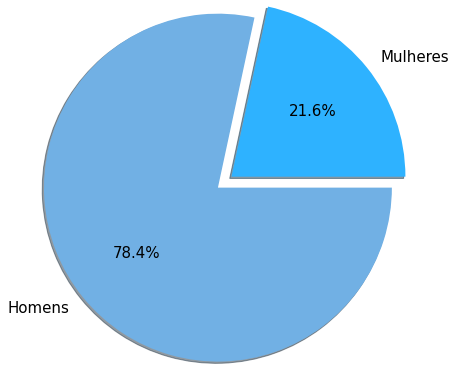

In [148]:
ax = plt.pie(percentual_suicidios_sexo_brasil, labels=['Mulheres', 'Homens'], autopct='%0.1f%%', shadow=True, colors=colors_two, explode=[0.1, 0.1], radius=2.0, textprops={'fontsize': 15})

Observa-se existe uma prevalência de suicídios entre os homens, sendo que de todos os casos, 78.5% foram cometidos por homens. Ou seja, muito superior em comparação às mulheres, com uma porcentagem de 21.6% de todos os casos em que o indivíduo tirou a própria vida.

#Correlação entre o número de suicídios e o produto interno bruto

A matriz de correlação, apresentada a seguir está indicando que o número de suicídios não reduziu com o aumento do Produto Interno Bruto (PIB) per capita. Apesar da matriz apresentar a correlação entre o IDH e o número de suicídios, optou-se por não tirar nenhuma conclusão, pois existe muitos dados faltantes, podendo levar a interpretações errôneas. Algo que poderia ser feito para considerar o IDH, seria buscar este dado em outras fontes e, concatenar com o dataframe aqui analisado, porém será um trabalho futuro.

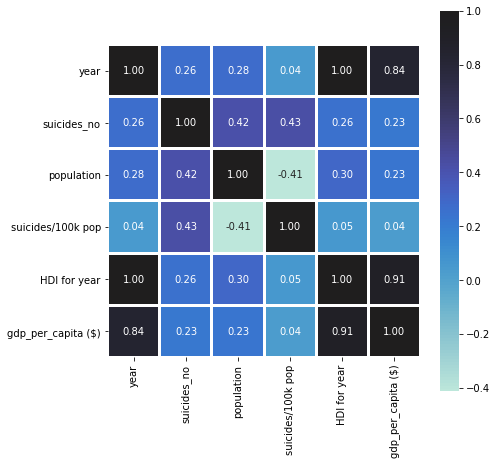

In [149]:
ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(suicidios_brasil.corr(),annot=True, center=True, square=True, fmt='.2f', linewidths=2.0)
ax.xaxis.label.set_size(20)
plt.show()

#O suicídio é um sério problema de saúde pública. Faça a sua parte e, salve vidas! Uma pequena ação pode ajudar o seu amigo que está passando por problemas.

**CONTATOS ÚTEIS:**

**Centro de Valorização da Vida.**
Disponível 24 horas por telefone e no seguinte horário por chat: Dom - 17h à 01h, Seg a Qui - 09h à 01h, Sex - 15h às 23h, Sáb - 16h à 01h.
**Telefone:** 188. **Site:** www.cvv.org.br